In [1]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="picnn_entropic_optimal_transport_quantile_regression",
    pushforward_operator_parameters=dict(
        x_dimension=1,
        y_dimension=2,
        u_dimension=3,
        z_dimension=4,
        number_of_hidden_layers=4,
        epsilon=1e-5,
        number_of_samples_for_entropy_dual_estimation=2048
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=1,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
model = model.load("../experiments_with_results/entropic_optimal_transport/PICNN/weights.pth", map_location=torch.device("cpu"))
_ = model.eval()

Epoch: 1, Objective: 4.241, LR: 0.000000: 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]


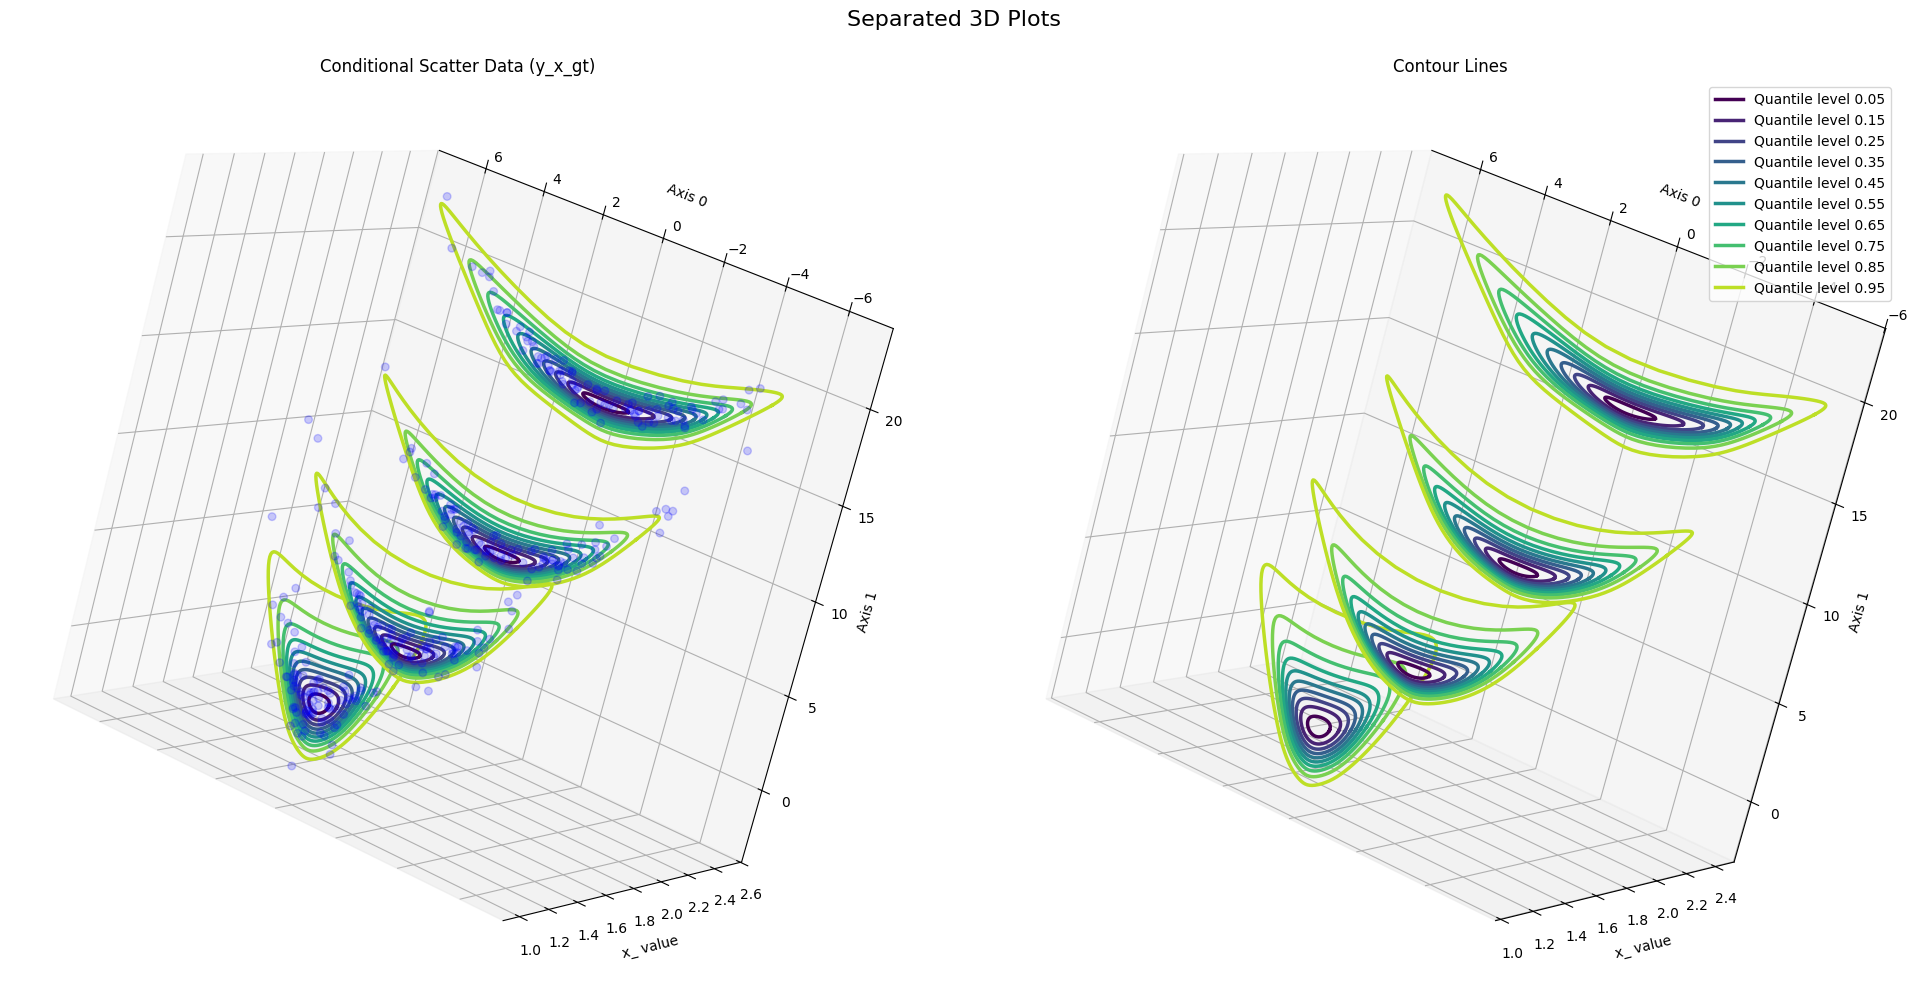

In [2]:
%matplotlib inline
from utils.plot import plot_potentials_from_banana_dataset

plot_potentials_from_banana_dataset(model=model, number_of_conditional_points=4, number_of_points_to_sample=100, tensor_parameters=experiment.tensor_parameters)

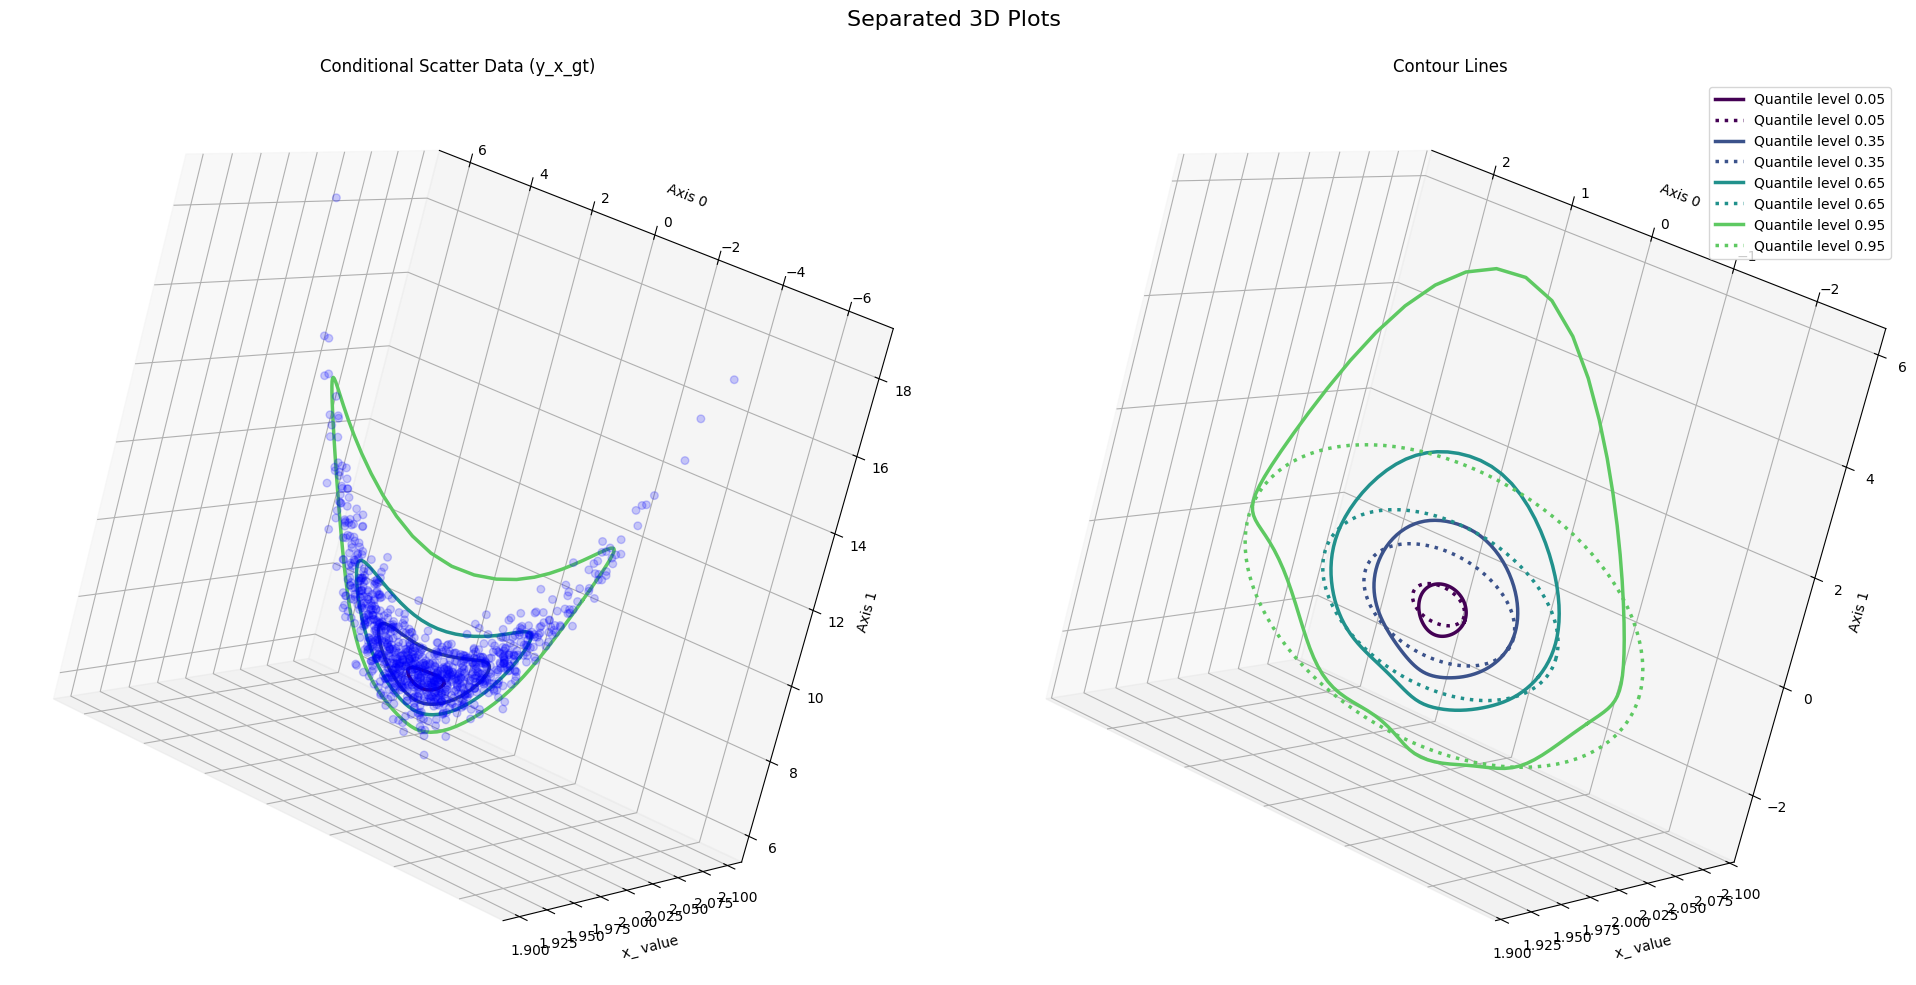

In [9]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_banana_dataset

plot_quantile_levels_from_banana_dataset(
    model=model,
    number_of_points_to_sample=1000,
    tensor_parameters=experiment.tensor_parameters,
    conditional_value=2,
    number_of_quantile_levels=4
)